In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
tr_x = np.array([0,2,3,5])
tr_y = np.array([1,4,9,16])
te_x = np.array([1,4])
te_y = np.array([3,12])
b = []
for i in range(4):
    a = np.polyfit(tr_x, tr_y, i)
    b.append(np.poly1d(a))
c = ['b', 'g', 'y', 'k']

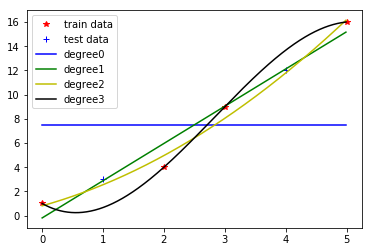

In [6]:
plt.plot(tr_x, tr_y, 'r*', label='train data')
plt.plot(te_x, te_y, 'b+', label='test data')
#d = np.sort(np.concatenate((tr_x, te_x)))
d = np.array([float(i)/100 for i in range(500)])
for i in range(4):
    plt.plot(d, b[i](d), color =c[i], label='degree' + str(i))
plt.legend()
plt.show()

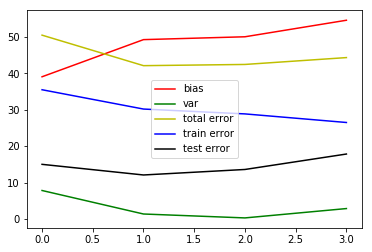

In [9]:
bias = []
var = []
total_error = []
train_error = []
test_error = []
d = np.sort(np.concatenate((tr_x, te_x)))
for deg in [0,1,2,3]:
    bias.append((np.mean(np.array([b[deg][i] for i in d]) - np.mean(np.concatenate((tr_y, te_y)))))**2)
    var.append(np.mean(np.array([(b[deg][i]-np.mean(np.array([b[deg][i] for i in d])))**2 for i in d])))
    total_error.append(np.sum(np.abs(np.array(np.concatenate((tr_y, te_y)))-np.array([b[deg][i] for i in d]))))
    train_error.append(np.sum(np.abs(tr_y - np.array([b[deg][i] for i in tr_x.tolist()]))))
    test_error.append(np.sum(np.abs(te_y - np.array([b[deg][i] for i in te_x.tolist()]))))
plt.plot(bias, 'r', label='bias')
plt.plot(var, 'g', label='var')
plt.plot(total_error, 'y', label='total error')
plt.plot(train_error, 'b', label='train error')
plt.plot(test_error, 'k', label='test error')
plt.legend()
plt.show()